In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Arc
import seaborn as sns
import math

In [2]:
df = pd.read_csv('WSOC v Sonoma St Export for Sophia Bruno 4286 - Copy.csv')

In [3]:
df.head()

,Timestamp,Seconds,Velocity,Acceleration,Odometer,Latitude,Longitude,Heart Rate,Player Load,Positional Quality (%),HDOP,#Sats
0,11/17/2019 14:51:29.09,0.0,0.02,0.013142,0.0,32.887902,-117.240098,0,0.0,72.7,0.74,12
1,11/17/2019 14:51:29.19,0.1,0.03,0.023500,0.0,32.887902,-117.240098,0,0.0,72.7,0.74,12
2,11/17/2019 14:51:29.29,0.2,0.03,0.034625,0.0,32.887902,-117.240098,0,0.0,73.7,0.74,12
3,11/17/2019 14:51:29.39,0.3,0.04,0.043564,0.0,32.887902,-117.240098,0,0.0,73.5,0.74,12
4,11/17/2019 14:51:29.49,0.4,0.04,0.048079,0.0,32.887902,-117.240098,0,0.0,73.5,0.74,12


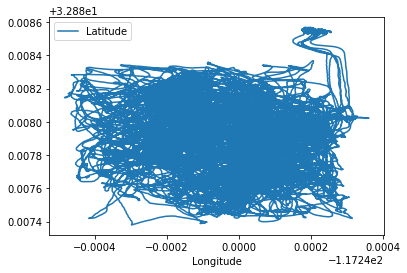

In [31]:
df.plot('Longitude','Latitude')

In [283]:
ch = pd.read_excel('Christine.xlsx')

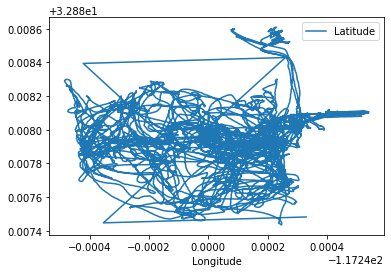

In [284]:
ch.plot('Longitude','Latitude')

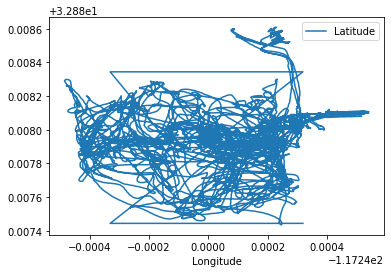

In [186]:
cha = pd.read_excel('Christine - Copy.xlsx')

cha.plot('Longitude','Latitude')

In [187]:
cornersa = cha.tail(4).values
cornersa[0][0] - cornersa[2][0], cornersa[1][0] - cornersa[3][0]

(0.0008999999999943498, 0.0008999999999943498)

In [188]:
cornersa[0][1] - cornersa[1][1], cornersa[2][1] - cornersa[3][1]

(-0.0006501000000014301, -0.0006501000000014301)

# GPS Coordinates Conversion

In [4]:
def lat_con(lat):
    y0 = 32.887444
    
    output = 95 - ((lat - y0)*100000)
    return output

def long_con(long):
    x0 = -117.2403311
    
    output = (long - x0)*100000
    return output

In [336]:
ch['ConLat'] = ch.Latitude.apply(lat_con)
ch['ConLong'] = ch.Longitude.apply(long_con)

In [337]:
ch.tail(4)

,Latitude,Longitude,C,ConLat,ConLong
186631,32.888394,-117.240422,"32.888394,-117.240422",3.990408e-10,-9.09
186632,32.888429,-117.239740,"32.888429,-117.23974",-3.500000e+00,59.11
186633,32.887447,-117.240354,"32.887447,-117.240354",9.470000e+01,-2.29
186634,32.887482,-117.239670,"32.887482,-117.23967",9.120000e+01,66.11


In [338]:
corners = ch.tail(4).values
corners[0][0] - corners[2][0], corners[1][0] - corners[3][0]

(0.0009469999999964784, 0.0009470000000035839)

In [339]:
corners[0][1] - corners[1][1], corners[2][1] - corners[3][1]

(-0.000681999999997629, -0.0006839999999925794)

In [340]:
lat_list = []
long_list = []
for i in ch[['ConLat', 'ConLong']].values:
    a, b = r((i[0],i[1]), 0.0488132, origin=(95,0))
    lat_list.append(a)
    long_list.append(b)

# Soccer Pitch

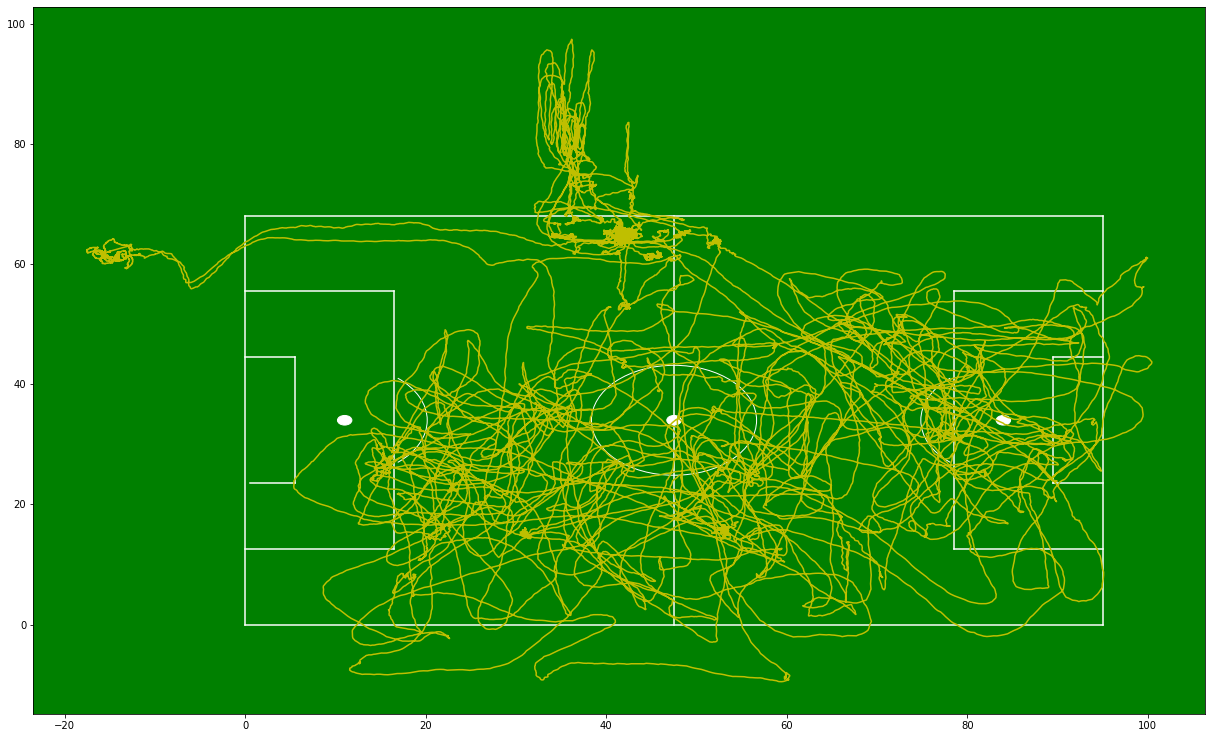

In [10]:
#Create figure
fig=plt.figure()
fig.set_size_inches(21, 13)
ax=fig.add_subplot(1,1,1)
ax.set_facecolor("green")

#Pitch Outline & Centre Line
plt.plot([0,0],[0,68], color="white")
plt.plot([0,95],[68,68], color="white")
plt.plot([95,95],[68,0], color="white")
plt.plot([95,0],[0,0], color="white")
plt.plot([47.5,47.5],[0,68], color="white")

#Left Penalty Area
plt.plot([16.5,16.5],[55.5,12.5],color="white")
plt.plot([0,16.5],[55.5,55.5],color="white")
plt.plot([16.5,0],[12.5,12.5],color="white")

#Right Penalty Area
plt.plot([95,78.5],[55.5,55.5],color="white")
plt.plot([78.5,78.5],[55.5,12.5],color="white")
plt.plot([78.5,95],[12.5,12.5],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[44.5,44.5],color="white")
plt.plot([5.5,5.5],[44.5,23.5],color="white")
plt.plot([5.5,0.5],[23.5,23.5],color="white")

#Right 6-yard Box
plt.plot([95,89.5],[44.5,44.5],color="white")
plt.plot([89.5,89.5],[44.5,23.5],color="white")
plt.plot([89.5,95],[23.5,23.5],color="white")

#Prepare Circles
centreCircle = plt.Circle((47.5,34),9.15,color="white",fill=False)
centreSpot = plt.Circle((47.5,34),0.8,color="white")
leftPenSpot = plt.Circle((11,34),0.8,color="white")
rightPenSpot = plt.Circle((84,34),0.8,color="white")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,34),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
rightArc = Arc((84,34),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Display Pitch
#plt.plot(em['ConLat'], em['ConLong'], 'y')
plt.plot(lat_list, long_list, 'y')

plt.show()


In [6]:
def r(point, radians, origin=(0, 0)):
    """Rotate a point around a given point.
    
    I call this the "low performance" version since it's recalculating
    the same values more than once [cos(radians), sin(radians), x-ox, y-oy).
    It's more readable than the next function, though.
    """
    x, y = point
    ox, oy = origin

    qx = ox + math.cos(radians) * (x - ox) + math.sin(radians) * (y - oy)
    qy = oy + -math.sin(radians) * (x - ox) + math.cos(radians) * (y - oy)

    return qx, qy

In [2]:
em = pd.read_excel('Emily.xlsx')

In [5]:
em['ConLat'] = em.Latitude.apply(lat_con)
em['ConLong'] = em.Longitude.apply(long_con)

In [9]:
lat_list = []
long_list = []
for i in em[['ConLat', 'ConLong']].values:
    a, b = r((i[0],i[1]), 0.0488132, origin=(95,0))
    lat_list.append(a)
    long_list.append(b)